In [54]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math
import re
import pickle
import scipy
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')

In [9]:
with open('/Users/krk/flatiron/mod_2/project/df_clean.pickle', 'rb') as handle:
    df_clean = pickle.load(handle)

## Statistical Testing
### Chi2 of paint-color and state

In [7]:
# Ho: no difference between proportion car color and the state they are in
# Ha: difference between proportion of car color and the state they are in

In [10]:
observed = df_clean.groupby(by = 'state')['paint_color'].value_counts().unstack()
observed.fillna(0, inplace = True)
total_obs = df_clean.shape[0]
obs_by_color = observed.sum(axis = 0).to_dict()
obs_by_state = observed.sum(axis = 1).values
expected = observed.apply(lambda x: obs_by_state * obs_by_color[x.name] / total_obs ,axis = 0)
dof = (observed.shape[0] - 1) * (observed.shape[1] - 1)
dof
# alpha is 0.05
scipy.stats.chisquare(observed.values, expected, ddof = 0, axis = None)

Power_divergenceResult(statistic=4622.841165256088, pvalue=0.0)

In [11]:
#we can reject the null with 95% confidence

---

### Chi2 of manufacturer and state

In [12]:
# Ho: no difference between proportion of the manufacturer and the state they are in
# Ha: difference between proportion of the manufacturer and the state they are in

In [13]:
observed = df_clean.groupby(by = 'state')['manufacturer'].value_counts().unstack()
observed.fillna(0, inplace = True)
total_obs = df_clean.shape[0]
obs_by_manuf = observed.sum(axis = 0).to_dict()
obs_by_state = observed.sum(axis = 1).values
expected = observed.apply(lambda x: obs_by_state * obs_by_manuf[x.name] / total_obs ,axis = 0)
dof = (observed.shape[0] - 1) * (observed.shape[1] - 1)
# alpha is 0.05
scipy.stats.chisquare(observed.values, expected, ddof = 0, axis = None)
#we can reject the null with 95% confidence

Power_divergenceResult(statistic=38156.3553008739, pvalue=0.0)

---

### Chi2 of paintcolor and condition

In [14]:
observed = df_clean.groupby(by = 'paint_color')['condition'].value_counts().unstack()
observed.fillna(0, inplace = True)
total_obs = df_clean.shape[0]
obs_by_cond = observed.sum(axis = 0).to_dict()
obs_by_color = observed.sum(axis = 1).values
expected = observed.apply(lambda x: obs_by_color * obs_by_cond[x.name] / total_obs ,axis = 0)
dof = (observed.shape[0] - 1) * (observed.shape[1] - 1)
scipy.stats.chisquare(observed.values, expected, ddof = 0, axis = None)

Power_divergenceResult(statistic=1663.3599790984035, pvalue=2.0998547617477976e-300)

In [15]:
#we can reject the null with 95% confidence

---

## Vizualizations

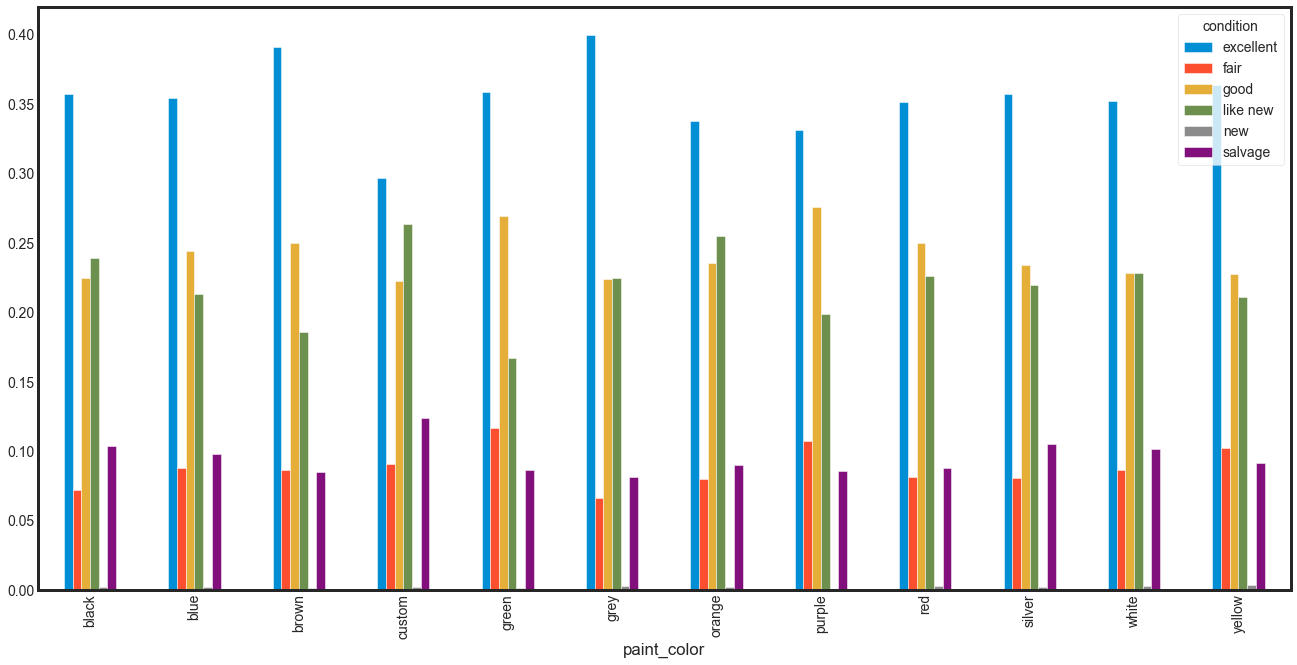

In [116]:
plt.style.use('fivethirtyeight')
sns.set_style('white')
fig, ax = plt.subplots(figsize = (20,10))
df_clean.groupby(by = ['paint_color'])['condition'].value_counts(normalize = True).unstack().plot(kind = 'bar', ax=ax)

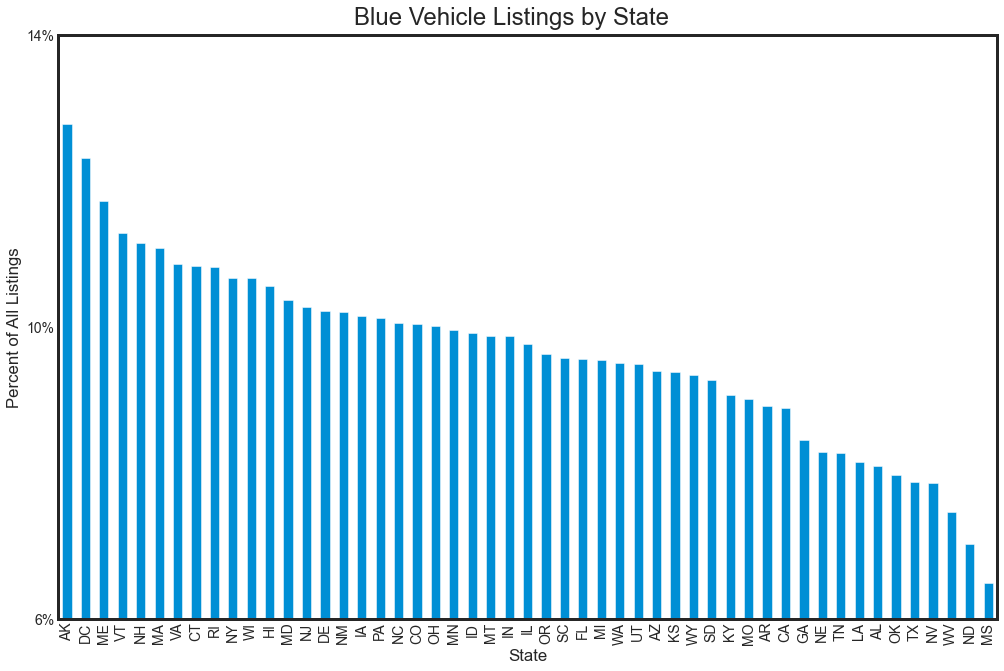

In [156]:
plt.style.use('fivethirtyeight')
sns.set_style('white')
color_by_state = df_clean.groupby(by = 'state')['paint_color'].value_counts(normalize = True).unstack()
fig, ax = plt.subplots(figsize = (15,10))
color_by_state['red'].sort_values(ascending = False).plot(kind = 'bar', ax = ax)
states = [x.upper() for x in color_by_state['blue'].sort_values(ascending = False).index];
ax.set_xlabel('State')
ax.set_ylabel('Percent of All Listings')
ax.set_ylim((0.06,0.14))
# ax.grid(True)
ax.set_xticklabels(states);
ax.set_yticks([0.06,0.1,0.14])
ax.set_yticklabels(['6%','10%','14%'])
fig.suptitle('Blue Vehicle Listings by State', y = .92, fontsize=24);
fig.savefig('blue_vehicles_by_state.png',bbox_inches = 'tight')

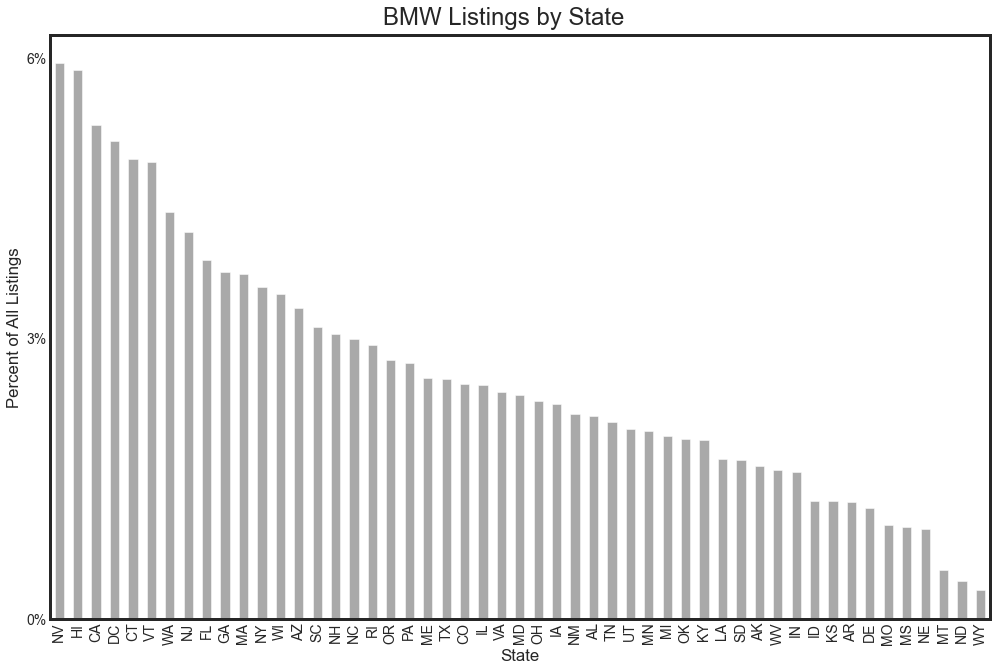

In [159]:
plt.style.use('fivethirtyeight')
sns.set_style('white')
manufacturer_by_state = df_clean.groupby(by = 'state')['manufacturer'].value_counts(normalize = True).unstack()
fig, ax = plt.subplots(figsize = (15,10))
manufacturer_by_state['bmw'].sort_values(ascending = False).plot(kind = 'bar', ax = ax, color = 'darkgrey')
states = [x.upper() for x in manufacturer_by_state['bmw'].sort_values(ascending = False).index];
ax.set_xlabel('State')
ax.set_ylabel('Percent of All Listings')
ax.set_xticklabels(states);
ax.set_yticks([0,0.03,0.06])
ax.set_yticklabels(['0%','3%','6%'])
fig.suptitle('BMW Listings by State', y = .92, fontsize=24);
fig.savefig('bmw_by_state.png', bbox = 'tight')

## Non-linear Transformations

In [48]:
features = [
 'year',
 'odometer',
 'vin',
 'lat',
 'long',
 'age']

In [49]:
#break the colums in to groups to plot 4 on a row at a time
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

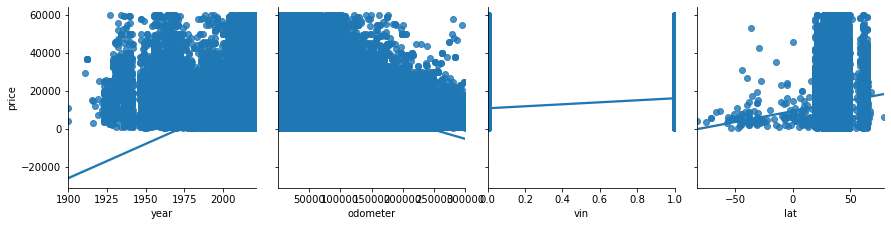

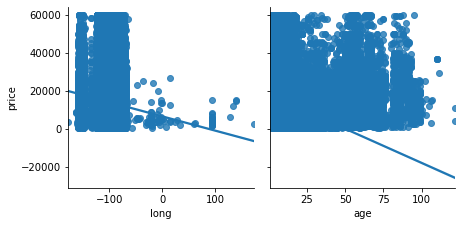

In [50]:
for i in row_groups:
    pp = sns.pairplot(data=df_clean, y_vars=['price'],x_vars=i, kind="reg", height=3)

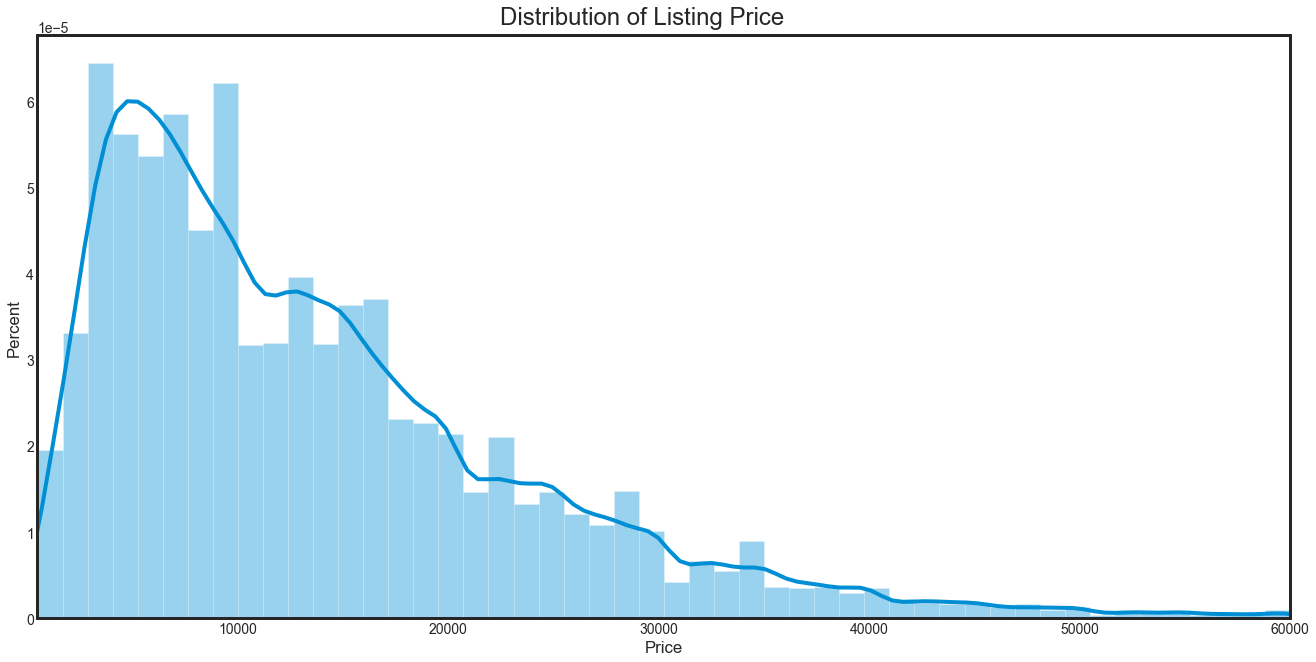

In [177]:
fig, ax = plt.subplots(figsize = (20,10))
ax = sns.distplot(df_clean['price'])
ax.set_xlim((500,60000))
ax.set_xlabel('Price')
ax.set_ylabel('Percent')
fig.suptitle('Distribution of Listing Price', y = .92, fontsize=24);
fig.savefig('price_dist.png', bbox = 'tight')